# SMAI Assignment - 3

## Question - `3` : Knowing MLPs

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

### Step zero: Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
%matplotlib inline

import torch
import torchvision
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt    
import torch.utils.data as data     
import copy
import random
import time
from sklearn import metrics
from sklearn import decomposition
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

### Step one: Using a PyTorch Dataset
Load MNIST dataset from `torchvision.datasets`

In [2]:
transform = transforms.Compose([
                    transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))
            ])

trainset =  datasets.MNIST(root='./data', train=True, download=True, transform=transform)
#TODO use datasets.MNIST

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
#TODO

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
trainloader_minibatch = torch.utils.data.DataLoader(trainset, batch_size=64
                                                    , shuffle=True, num_workers=2)
trainloader_stochastic = torch.utils.data.DataLoader(trainset, batch_size=1
                                                     , shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

In [4]:
# Set device cuda for GPU if it's available otherwise run on the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

#tqdm
This code snippet imports the "tqdm" library and creates a progress bar using the total number of mini-batches in the "trainloader_minibatch" dataset. The code then iterates through the mini-batches using a for loop, printing the index, data size, and label size of each mini-batch. The progress bar is updated with each iteration using the "update" method, and the loop is broken after the first iteration using the "break" statement. Finally, the progress bar is refreshed using the "refresh" method to display the current progress.

Overall, this code is a simple example of how to use the "tqdm" library to create a progress bar for an iterative process, in this case, iterating through mini-batches in a training dataset. The progress bar provides visual feedback to the user, indicating the progress of the iteration and an estimate of the time remaining.

In [5]:
from tqdm import tqdm
pbar = tqdm(total=len(trainloader_minibatch))
loop = 20
for idx, (data,label) in enumerate(trainloader_minibatch):
    print(idx,data.size(),label.size())
    pbar.update(1)
    loop -= 1
    if loop < 0:
      break
pbar.refresh()

  1%|          | 11/938 [00:00<00:17, 54.53it/s]

0 torch.Size([64, 1, 28, 28]) torch.Size([64])
1 torch.Size([64, 1, 28, 28]) torch.Size([64])
2 torch.Size([64, 1, 28, 28]) torch.Size([64])
3 torch.Size([64, 1, 28, 28]) torch.Size([64])
4 torch.Size([64, 1, 28, 28]) torch.Size([64])
5 torch.Size([64, 1, 28, 28]) torch.Size([64])
6 torch.Size([64, 1, 28, 28]) torch.Size([64])
7 torch.Size([64, 1, 28, 28]) torch.Size([64])
8 torch.Size([64, 1, 28, 28]) torch.Size([64])
9 torch.Size([64, 1, 28, 28]) torch.Size([64])
10 torch.Size([64, 1, 28, 28]) torch.Size([64])
11 torch.Size([64, 1, 28, 28]) torch.Size([64])
12 torch.Size([64, 1, 28, 28]) torch.Size([64])
13 torch.Size([64, 1, 28, 28]) torch.Size([64])
14 torch.Size([64, 1, 28, 28]) torch.Size([64])
15 torch.Size([64, 1, 28, 28]) torch.Size([64])
16 torch.Size([64, 1, 28, 28]) torch.Size([64])


  2%|▏         | 21/938 [00:00<00:14, 64.59it/s]

17 torch.Size([64, 1, 28, 28]) torch.Size([64])
18 torch.Size([64, 1, 28, 28]) torch.Size([64])
19 torch.Size([64, 1, 28, 28]) torch.Size([64])
20 torch.Size([64, 1, 28, 28]) torch.Size([64])


True

### Step two: Define a MLP Model and without any bells and whitsles...
... along with a CrossEntropy loss criterion 

Do not use Dropout, BN or any other thing. Use ReLU for hidden layers.

⚠️ Do not use SoftMax in the output as nn.CrossEntropyLoss combines SoftMax and NLLLoss.

In [6]:
class SimpleMLP(nn.Module):
    def __init__(self):
      super(SimpleMLP,self).__init__()
      self.fc1 = nn.Linear(28*28, 128)  # Input layer to hidden layer
      self.relu = nn.ReLU()  # Activation function
      self.fc2 = nn.Linear(128, 10)  # Hidden layer to output layer
        # code here
    def forward(self,x):
      x = x.view(-1, 28*28)  # Flatten the input image
      x = self.fc1(x)
      x = self.relu(x)
      x = self.fc2(x)
      # code here

      return x

### Step three: Define the following optimizers using nn.optim
1. SGD
2. SGD with momentum
3. SGD with L2 regularization
4. RMSprop
5. Adam

In [7]:
# code here
mlp = SimpleMLP()

In [8]:
mlp.train()

SimpleMLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

# mlp.train()
 is a method in PyTorch that sets the model in training mode. When a model is in training mode, it enables certain layers of the model such as Dropout or Batch Normalization to work properly by keeping track of the statistics of the input data.

In the given code snippet, mlp.train() is called after creating an instance of the SimpleMLP class. However, since no training loop is implemented, it does not have any effect on the model. It is recommended to use mlp.train() when training the model with a training loop and mlp.eval() when testing the model on a validation or test set.

To summarize, mlp.train() is used to set the model in training mode and it is only effective when used within a training loop.

In [9]:
mlp = mlp.to(device)
optimizer_SGD = optim.SGD(mlp.parameters(), lr=0.01)
# SGD SIMPLE


optimizer_SGD_momentum =  optim.SGD(mlp.parameters(), lr=0.01, momentum=0.9)
# SGD WITH MEMORISATION

#SGD with L2 regularisation
optimizer_SGD_L2_reg =  optim.SGD(mlp.parameters(), lr=0.0001)


#RMSprop
optimizer_RMS = optim.RMSprop(mlp.parameters(), lr=0.001)


#Adam
optimizer_Adam = optim.Adam(mlp.parameters(), lr=0.001)

### Step four: Run the SimpleMLP using different optimizers and plot train and test loss for each optimizer.
Explain the results.

Report final accuracy, F1 score and other relavant metrics in a tabular form on test and train datasets.

In [10]:
optimizers = {
    "optimizer_SGD" : optimizer_SGD,
    "optimizer_SGD_momentum" : optimizer_SGD_momentum,
    "optimizer_SGD_L2_reg": optimizer_SGD_L2_reg,
    "optimizer_RMS" : optimizer_RMS,
    "optimizer_Adam" : optimizer_Adam
}

In [11]:
# code, plots and explainiation here
def plot_losses(train_loss, val_loss,optimizers):
  for opt_name, optimizer in optimizers.items():
    print(opt_name)
    plt.plot(train_loss[opt_name], label=f"{opt_name} train")
    plt.plot(val_loss[opt_name], label=f"{opt_name} val")
    plt.legend()
    plt.show()
    print()
    print()

In [12]:
def train(model,optimizers):
  EPOCHS = 15
  train_loss = {opt_name: [] for opt_name in optimizers}
  val_loss = {opt_name: [] for opt_name in optimizers}
  # Train the MLP with each optimizer and store the losses

  for opt_name, optimizer in optimizers.items():
    print(f"Training with optimizer: {opt_name}")

    #  # Move model to the same device as the data
    for epoch in range(EPOCHS):
      pbar = tqdm(total=len(trainloader_minibatch))
      out_loss = 0
      epoch_train_loss = 0.0
      epoch_test_loss = 0.0

      for batch_idx, (data, target) in enumerate(trainloader_minibatch):
        optimizer.zero_grad()
        '''ensures that we start with a clean slate
         for the gradients of the current batch, so
          that we can compute the gradients for that
          batch without interference from the
          gradients computed for previous batches.
        '''
        # Move data to GPU if available
        data, target = data.to(device), target.to(device)
        # Compute the forward pass
        output = model(data)
        # Compute the loss
        loss = torch.nn.functional.cross_entropy(output, target)
        # Compute gradients and update weights
        loss.backward()
        optimizer.step()
        # Accumulate the loss
        out_loss += loss.cpu().data.item()
        pbar.update(1)
        pbar.desc= f'Loss: {loss.item()}'

        # Accumulate the loss
        epoch_train_loss += loss.item() * data.size(0)
      # Store the training loss for the current epoch and optimizer
      train_loss[opt_name].append(out_loss/len(trainloader_minibatch))

      with torch.no_grad():
        out_loss = 0
        for batch_idx, (data, target) in enumerate(testloader):
          # Move data to GPU if available
          data, target = data.to(device), target.to(device)
          # Compute forward pass
          output = model(data)
          # Compute the loss
          loss =  torch.nn.functional.cross_entropy(output, target)
          # Accumulate the loss
          out_loss += loss.cpu().data.item()
          epoch_test_loss += loss.item() * data.size(0)
        # Store the validation loss for the current epoch and optimizer  
        val_loss[opt_name].append(out_loss/len(testloader))
      # Print the epoch statistics
      epoch_train_loss /= len(trainset)
      epoch_test_loss /= len(testset)
      print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")  
      print()
      pbar.refresh()
      pbar.close()
  return train_loss,val_loss

In [13]:
def performance(model,optimizers):
  train_preds, train_labels = [], []
  test_preds, test_labels = [], []

  for optimizer_name, optimizer in optimizers.items():
    model.eval()
    for inputs, labels in trainloader_minibatch:
        inputs , labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        train_preds.extend(preds.tolist())
        train_labels.extend(labels.tolist())

    for inputs, labels in testloader:
        inputs , labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.tolist())
        test_labels.extend(labels.tolist())

  return train_preds, train_labels,test_preds, test_labels
    


In [14]:
def get_metrics_somehow(model,train_preds, train_labels,test_preds, test_labels, optimizers):
  # Evaluate the final performance of the model on the train and test datasets
  metrics = []
  i = 1
  for optimizer_name, optimizer in optimizers.items():
      train_acc = accuracy_score(train_labels, train_preds)
      test_acc = accuracy_score(test_labels, test_preds)
      train_f1, _, _, _ = precision_recall_fscore_support(train_labels, train_preds, average='macro')
      test_f1, _, _, _ = precision_recall_fscore_support(test_labels, test_preds, average='macro')
      # Create a DataFrame for the performance metrics
      # Add the performance metrics to the list
      metrics.append({
          'Optimizer': optimizer_name,
          'Accuracy Train': train_acc,
          'Accuracy Test': test_acc,
          'F1 Score Train': train_f1,
          'F1 Score Test': test_f1
      })
      i+=1
  # Create a DataFrame from the list of metrics
  metrics_df = pd.DataFrame(metrics)

  return metrics_df    




In [15]:
train_loss,val_loss= train(mlp,optimizers)

Training with optimizer: optimizer_SGD



Loss: 0.42985403537750244: 100%|██████████| 938/938 [00:32<00:00, 28.75it/s]


Epoch 1/15, Train Loss: 0.7514, Test Loss: 0.4002




Loss: 0.25718241930007935: 100%|██████████| 938/938 [00:16<00:00, 56.01it/s]


Epoch 2/15, Train Loss: 0.3692, Test Loss: 0.3302




Loss: 0.45314231514930725: 100%|██████████| 938/938 [00:17<00:00, 53.17it/s]


Epoch 3/15, Train Loss: 0.3247, Test Loss: 0.2988




Loss: 0.2750844955444336: 100%|██████████| 938/938 [00:16<00:00, 55.52it/s]


Epoch 4/15, Train Loss: 0.2998, Test Loss: 0.2802




Loss: 0.10834433883428574: 100%|██████████| 938/938 [00:17<00:00, 52.65it/s]


Epoch 5/15, Train Loss: 0.2796, Test Loss: 0.2639




Loss: 0.24246731400489807: 100%|██████████| 938/938 [00:18<00:00, 51.65it/s]


Epoch 6/15, Train Loss: 0.2623, Test Loss: 0.2491




Loss: 0.15389367938041687: 100%|██████████| 938/938 [00:18<00:00, 50.98it/s]


Epoch 7/15, Train Loss: 0.2454, Test Loss: 0.2365




Loss: 0.32075807452201843: 100%|██████████| 938/938 [00:19<00:00, 48.35it/s]


Epoch 8/15, Train Loss: 0.2302, Test Loss: 0.2213




Loss: 0.08012416213750839: 100%|██████████| 938/938 [00:17<00:00, 54.19it/s]


Epoch 9/15, Train Loss: 0.2169, Test Loss: 0.2119




Loss: 0.1458621472120285: 100%|██████████| 938/938 [00:17<00:00, 54.07it/s]


Epoch 10/15, Train Loss: 0.2049, Test Loss: 0.1972




Loss: 0.2543138265609741: 100%|██████████| 938/938 [00:19<00:00, 47.80it/s]


Epoch 11/15, Train Loss: 0.1940, Test Loss: 0.1871




Loss: 0.04016558453440666: 100%|██████████| 938/938 [00:17<00:00, 53.39it/s]


Epoch 12/15, Train Loss: 0.1842, Test Loss: 0.1822




Loss: 0.3151770532131195: 100%|██████████| 938/938 [00:19<00:00, 48.77it/s]


Epoch 13/15, Train Loss: 0.1749, Test Loss: 0.1736




Loss: 0.15571895241737366: 100%|██████████| 938/938 [00:21<00:00, 42.99it/s]


Epoch 14/15, Train Loss: 0.1669, Test Loss: 0.1673




Loss: 0.1485254019498825: 100%|██████████| 938/938 [00:21<00:00, 44.04it/s]


Epoch 15/15, Train Loss: 0.1593, Test Loss: 0.1614

Training with optimizer: optimizer_SGD_momentum



Loss: 0.15615099668502808: 100%|██████████| 938/938 [00:17<00:00, 52.56it/s]


Epoch 1/15, Train Loss: 0.1732, Test Loss: 0.1385




Loss: 0.1023678332567215: 100%|██████████| 938/938 [00:19<00:00, 48.02it/s]


Epoch 2/15, Train Loss: 0.1268, Test Loss: 0.1040




Loss: 0.13302667438983917: 100%|██████████| 938/938 [00:20<00:00, 45.11it/s]


Epoch 3/15, Train Loss: 0.1036, Test Loss: 0.1024




Loss: 0.012381911277770996: 100%|██████████| 938/938 [00:20<00:00, 46.00it/s]


Epoch 4/15, Train Loss: 0.0895, Test Loss: 0.1061




Loss: 0.03419642522931099: 100%|██████████| 938/938 [00:18<00:00, 49.89it/s]


Epoch 5/15, Train Loss: 0.0753, Test Loss: 0.0892




Loss: 0.028380457311868668: 100%|██████████| 938/938 [00:19<00:00, 47.83it/s]


Epoch 6/15, Train Loss: 0.0664, Test Loss: 0.0944




Loss: 0.08843836188316345: 100%|██████████| 938/938 [00:19<00:00, 49.17it/s]


Epoch 7/15, Train Loss: 0.0592, Test Loss: 0.0926




Loss: 0.020820295438170433: 100%|██████████| 938/938 [00:18<00:00, 49.52it/s]


Epoch 8/15, Train Loss: 0.0529, Test Loss: 0.0906




Loss: 0.026538601145148277: 100%|██████████| 938/938 [00:20<00:00, 46.77it/s]


Epoch 9/15, Train Loss: 0.0487, Test Loss: 0.0880




Loss: 0.001983038382604718: 100%|██████████| 938/938 [00:18<00:00, 51.09it/s]


Epoch 10/15, Train Loss: 0.0438, Test Loss: 0.0802




Loss: 0.004022258799523115: 100%|██████████| 938/938 [00:19<00:00, 47.78it/s]


Epoch 11/15, Train Loss: 0.0410, Test Loss: 0.0791




Loss: 0.0051916236989200115: 100%|██████████| 938/938 [00:19<00:00, 47.01it/s]


Epoch 12/15, Train Loss: 0.0348, Test Loss: 0.0764




Loss: 0.030169686302542686: 100%|██████████| 938/938 [00:19<00:00, 48.54it/s]


Epoch 13/15, Train Loss: 0.0322, Test Loss: 0.0728




Loss: 0.24522753059864044: 100%|██████████| 938/938 [00:18<00:00, 49.38it/s]


Epoch 14/15, Train Loss: 0.0296, Test Loss: 0.0737




Loss: 0.0819195955991745: 100%|██████████| 938/938 [00:21<00:00, 44.55it/s]


Epoch 15/15, Train Loss: 0.0268, Test Loss: 0.0716

Training with optimizer: optimizer_SGD_L2_reg



Loss: 0.005793857388198376: 100%|██████████| 938/938 [00:19<00:00, 49.24it/s]


Epoch 1/15, Train Loss: 0.0202, Test Loss: 0.0701




Loss: 0.003989869263023138: 100%|██████████| 938/938 [00:19<00:00, 48.78it/s]


Epoch 2/15, Train Loss: 0.0190, Test Loss: 0.0693




Loss: 0.01904304139316082: 100%|██████████| 938/938 [00:21<00:00, 44.37it/s]


Epoch 3/15, Train Loss: 0.0183, Test Loss: 0.0687




Loss: 0.014867604710161686: 100%|██████████| 938/938 [00:18<00:00, 49.89it/s]


Epoch 4/15, Train Loss: 0.0177, Test Loss: 0.0683




Loss: 0.00035811224370263517: 100%|██████████| 938/938 [00:20<00:00, 46.75it/s]


Epoch 5/15, Train Loss: 0.0173, Test Loss: 0.0681




Loss: 0.012967410497367382: 100%|██████████| 938/938 [00:20<00:00, 45.66it/s]


Epoch 6/15, Train Loss: 0.0169, Test Loss: 0.0679




Loss: 0.001561869285069406: 100%|██████████| 938/938 [00:20<00:00, 46.35it/s]


Epoch 7/15, Train Loss: 0.0167, Test Loss: 0.0678




Loss: 0.18855203688144684: 100%|██████████| 938/938 [00:19<00:00, 49.08it/s]


Epoch 8/15, Train Loss: 0.0164, Test Loss: 0.0677




Loss: 0.002406307030469179: 100%|██████████| 938/938 [00:21<00:00, 43.24it/s]


Epoch 9/15, Train Loss: 0.0162, Test Loss: 0.0676




Loss: 0.04472333565354347: 100%|██████████| 938/938 [00:18<00:00, 49.60it/s]


Epoch 10/15, Train Loss: 0.0161, Test Loss: 0.0676




Loss: 0.03372647613286972: 100%|██████████| 938/938 [00:19<00:00, 48.16it/s]


Epoch 11/15, Train Loss: 0.0159, Test Loss: 0.0675




Loss: 0.0025935403537005186: 100%|██████████| 938/938 [00:21<00:00, 43.29it/s]


Epoch 12/15, Train Loss: 0.0158, Test Loss: 0.0675




Loss: 0.008822782896459103: 100%|██████████| 938/938 [00:19<00:00, 48.26it/s]


Epoch 13/15, Train Loss: 0.0156, Test Loss: 0.0674




Loss: 0.008410009555518627: 100%|██████████| 938/938 [00:20<00:00, 44.98it/s]


Epoch 14/15, Train Loss: 0.0155, Test Loss: 0.0674




Loss: 0.0018838017713278532: 100%|██████████| 938/938 [00:21<00:00, 44.43it/s]


Epoch 15/15, Train Loss: 0.0154, Test Loss: 0.0674

Training with optimizer: optimizer_RMS



Loss: 0.01496728602796793: 100%|██████████| 938/938 [00:21<00:00, 43.86it/s]


Epoch 1/15, Train Loss: 0.1651, Test Loss: 0.1213




Loss: 0.029294129461050034: 100%|██████████| 938/938 [00:20<00:00, 45.55it/s]


Epoch 2/15, Train Loss: 0.0855, Test Loss: 0.1305




Loss: 0.024012809619307518: 100%|██████████| 938/938 [00:22<00:00, 41.65it/s]


Epoch 3/15, Train Loss: 0.0726, Test Loss: 0.1314




Loss: 0.3519929051399231: 100%|██████████| 938/938 [00:20<00:00, 46.08it/s]


Epoch 4/15, Train Loss: 0.0647, Test Loss: 0.2392




Loss: 0.00454383809119463: 100%|██████████| 938/938 [00:22<00:00, 40.79it/s]


Epoch 5/15, Train Loss: 0.0615, Test Loss: 0.1143




Loss: 0.011013058945536613: 100%|██████████| 938/938 [00:21<00:00, 43.82it/s]


Epoch 6/15, Train Loss: 0.0565, Test Loss: 0.1030




Loss: 0.00011549306509550661: 100%|██████████| 938/938 [00:21<00:00, 42.99it/s]


Epoch 7/15, Train Loss: 0.0515, Test Loss: 0.1095




Loss: 0.005058232229202986: 100%|██████████| 938/938 [00:21<00:00, 43.33it/s]


Epoch 8/15, Train Loss: 0.0486, Test Loss: 0.1223




Loss: 0.010732298716902733: 100%|██████████| 938/938 [00:21<00:00, 42.81it/s]


Epoch 9/15, Train Loss: 0.0447, Test Loss: 0.1200




Loss: 0.0020637239795178175: 100%|██████████| 938/938 [00:20<00:00, 45.41it/s]


Epoch 10/15, Train Loss: 0.0424, Test Loss: 0.1099




Loss: 0.06143515184521675: 100%|██████████| 938/938 [00:23<00:00, 39.54it/s]


Epoch 11/15, Train Loss: 0.0395, Test Loss: 0.1673




Loss: 0.39971402287483215: 100%|██████████| 938/938 [00:20<00:00, 44.79it/s]


Epoch 12/15, Train Loss: 0.0384, Test Loss: 0.1518




Loss: 0.004657811485230923: 100%|██████████| 938/938 [00:22<00:00, 41.23it/s]


Epoch 13/15, Train Loss: 0.0359, Test Loss: 0.1080




Loss: 0.047560643404722214: 100%|██████████| 938/938 [00:23<00:00, 40.21it/s]


Epoch 14/15, Train Loss: 0.0361, Test Loss: 0.1060




Loss: 0.06279972940683365: 100%|██████████| 938/938 [00:22<00:00, 41.09it/s]


Epoch 15/15, Train Loss: 0.0338, Test Loss: 0.1679

Training with optimizer: optimizer_Adam



Loss: 0.038287509232759476: 100%|██████████| 938/938 [00:23<00:00, 40.71it/s]


Epoch 1/15, Train Loss: 0.0316, Test Loss: 0.1212




Loss: 0.0042940001003444195: 100%|██████████| 938/938 [00:23<00:00, 40.56it/s]


Epoch 2/15, Train Loss: 0.0266, Test Loss: 0.1445




Loss: 0.16512562334537506: 100%|██████████| 938/938 [00:22<00:00, 41.58it/s]


Epoch 3/15, Train Loss: 0.0257, Test Loss: 0.1290




Loss: 0.004920279607176781: 100%|██████████| 938/938 [00:23<00:00, 39.34it/s]


Epoch 4/15, Train Loss: 0.0279, Test Loss: 0.1443




Loss: 0.002319908468052745: 100%|██████████| 938/938 [00:23<00:00, 40.12it/s]


Epoch 5/15, Train Loss: 0.0274, Test Loss: 0.1185




Loss: 0.3757873475551605: 100%|██████████| 938/938 [00:23<00:00, 40.47it/s]


Epoch 6/15, Train Loss: 0.0219, Test Loss: 0.1217




Loss: 0.0035020143259316683: 100%|██████████| 938/938 [00:23<00:00, 40.24it/s]


Epoch 7/15, Train Loss: 0.0230, Test Loss: 0.1326




Loss: 0.0003864261962007731: 100%|██████████| 938/938 [00:22<00:00, 42.61it/s]


Epoch 8/15, Train Loss: 0.0219, Test Loss: 0.1474




Loss: 0.01596374623477459: 100%|██████████| 938/938 [00:25<00:00, 37.39it/s]


Epoch 9/15, Train Loss: 0.0254, Test Loss: 0.1178




Loss: 0.0016496324678882957: 100%|██████████| 938/938 [00:22<00:00, 41.23it/s]


Epoch 10/15, Train Loss: 0.0205, Test Loss: 0.1228




Loss: 0.02118252031505108: 100%|██████████| 938/938 [00:23<00:00, 40.68it/s]


Epoch 11/15, Train Loss: 0.0225, Test Loss: 0.1176




Loss: 0.16585545241832733: 100%|██████████| 938/938 [00:24<00:00, 39.05it/s]


Epoch 12/15, Train Loss: 0.0174, Test Loss: 0.1783




Loss: 0.004305922891944647: 100%|██████████| 938/938 [00:22<00:00, 42.08it/s]


Epoch 13/15, Train Loss: 0.0202, Test Loss: 0.1335




Loss: 0.0009632778237573802: 100%|██████████| 938/938 [00:26<00:00, 35.63it/s]


Epoch 14/15, Train Loss: 0.0188, Test Loss: 0.1312




Loss: 8.634024561615661e-05: 100%|██████████| 938/938 [00:22<00:00, 41.68it/s]

Epoch 15/15, Train Loss: 0.0167, Test Loss: 0.1451



optimizer_SGD


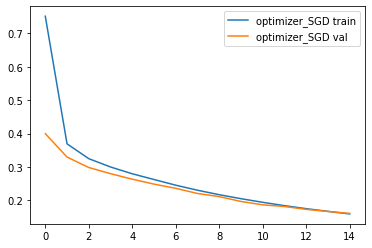



optimizer_SGD_momentum


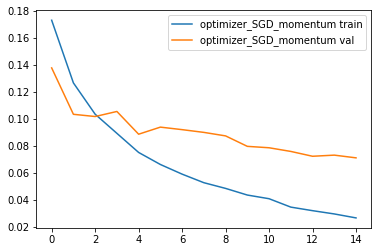



optimizer_SGD_L2_reg


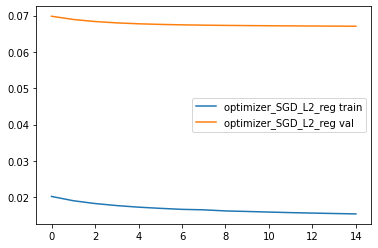



optimizer_RMS


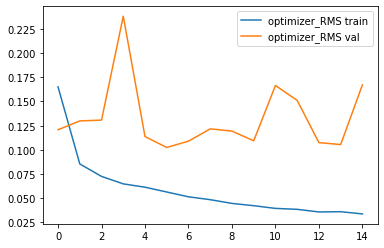



optimizer_Adam


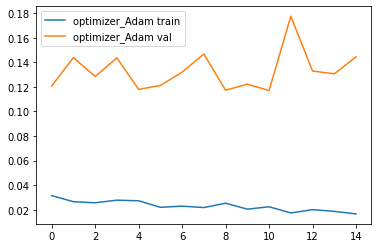

In [16]:
plot_losses(train_loss,val_loss,optimizers)

In [17]:
train_preds, train_labels,test_preds, test_labels = performance(mlp,optimizers)

optimizer_SGD


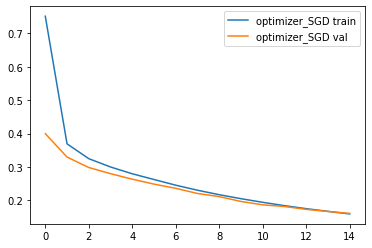



optimizer_SGD_momentum


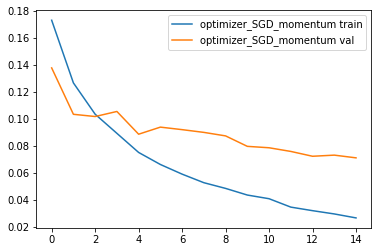



optimizer_SGD_L2_reg


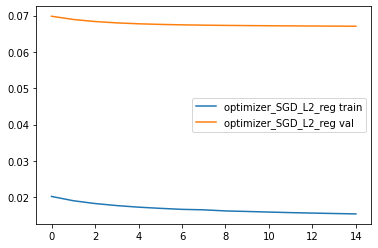



optimizer_RMS


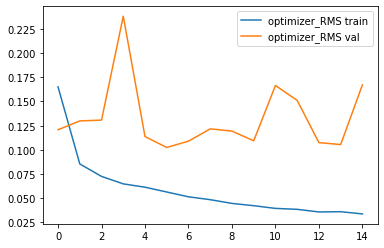



optimizer_Adam


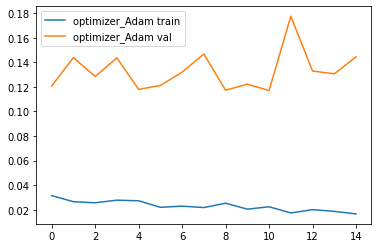

In [18]:
plot_losses(train_loss,val_loss,optimizers)


In [19]:
final_metrics = get_metrics_somehow(mlp, train_preds, train_labels,test_preds, test_labels, optimizers)
print(final_metrics)

                Optimizer  Accuracy Train  Accuracy Test  F1 Score Train  \
0           optimizer_SGD        0.994433         0.9752        0.994648   
1  optimizer_SGD_momentum        0.994433         0.9752        0.994648   
2    optimizer_SGD_L2_reg        0.994433         0.9752        0.994648   
3           optimizer_RMS        0.994433         0.9752        0.994648   
4          optimizer_Adam        0.994433         0.9752        0.994648   

   F1 Score Test  
0       0.975841  
1       0.975841  
2       0.975841  
3       0.975841  
4       0.975841  


### Step five: Using SimpleMLP and Adam optimizer, train models using 2 different lr_schedulers.
Select 2 of **MultiplicativeLR**, **MultiStepLR**, **LinearLR** and **ExponentialLR**

Compare the results among different LR schedulers and the original model which didn't employ any LR scheduler. Compile results in a tabular form. Plot losses for each. Explain results.

 ## MultiplicativeLR, MultiStepLR

In [30]:
def train1(model,optimizers):
  model.to(device)
  EPOCHS = 10
  train_loss = {opt_name: [] for opt_name in optimizers}
  val_loss = {opt_name: [] for opt_name in optimizers}
  # Train the MLP with each optimizer and store the losses

  for opt_name, optimizer in optimizers.items():
    print(f"Training with optimizer: {opt_name}")

    #  # Move model to the same device as the data
    for epoch in range(EPOCHS):
      pbar = tqdm(total=len(trainloader_minibatch))
      out_loss = 0
      epoch_train_loss = 0.0
      epoch_test_loss = 0.0

      for batch_idx, (data, target) in enumerate(trainloader_minibatch):
        # optimizer.zero_grad()
        '''ensures that we start with a clean slate
         for the gradients of the current batch, so
          that we can compute the gradients for that
          batch without interference from the
          gradients computed for previous batches.
        '''
        # Move data to GPU if available
        data, target = data.to(device), target.to(device)
        # Compute the forward pass
        output = model(data)
        # Compute the loss
        loss = torch.nn.functional.cross_entropy(output, target)
        # Compute gradients and update weights
        loss.backward()
        optimizer.step()
        # Accumulate the loss
        out_loss += loss.cpu().data.item()
        pbar.update(1)
        pbar.desc= f'Loss: {loss.item()}'

        # Accumulate the loss
        epoch_train_loss += loss.item() * data.size(0)
      # Store the training loss for the current epoch and optimizer
      train_loss[opt_name].append(out_loss/len(trainloader_minibatch))

      with torch.no_grad():
        out_loss = 0
        for batch_idx, (data, target) in enumerate(testloader):
          # Move data to GPU if available
          data, target = data.to(device), target.to(device)
          # Compute forward pass
          output = model(data)
          # Compute the loss
          loss =  torch.nn.functional.cross_entropy(output, target)
          # Accumulate the loss
          out_loss += loss.cpu().data.item()
          epoch_test_loss += loss.item() * data.size(0)
        # Store the validation loss for the current epoch and optimizer  
        val_loss[opt_name].append(out_loss/len(testloader))
      # Print the epoch statistics
      epoch_train_loss /= len(trainset)
      epoch_test_loss /= len(testset)
      print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")  
      print()
      pbar.refresh()
      pbar.close()
  return train_loss,val_loss

In [21]:
# code and analysis here
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optim_Adam = optim.Adam(SimpleMLP().parameters(), lr=0.001)

In [22]:
# Define learning rate schedulers
MultiplicativeLR = optim.lr_scheduler.MultiplicativeLR(optim_Adam, lr_lambda=lambda epoch: 0.95)


In [23]:
MultiStepLR = optim.lr_scheduler.MultiStepLR(optim_Adam, milestones=[5, 10, 15], gamma=0.1)


In [24]:
optimizers = {
    "MultiplicativeLR" : MultiplicativeLR,
    "MultiStepLR" : MultiStepLR
}

In [25]:
mlp = SimpleMLP()

In [31]:
train_loss,val_loss= train1(mlp,optimizers)

Training with optimizer: MultiplicativeLR




  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<02:04,  7.50it/s]

Loss: 2.36057186126709:   1%|          | 9/938 [00:00<00:21, 43.98it/s]

Loss: 2.332763671875:   2%|▏         | 15/938 [00:00<00:19, 46.97it/s] 

Loss: 2.324477195739746:   2%|▏         | 21/938 [00:00<00:18, 50.31it/s]

Loss: 2.3514626026153564:   3%|▎         | 29/938 [00:00<00:16, 54.93it/s]

Loss: 2.3271820545196533:   4%|▍         | 36/938 [00:00<00:15, 59.47it/s]

Loss: 2.308260202407837:   5%|▍         | 43/938 [00:00<00:14, 60.00it/s] 

Loss: 2.3748183250427246:   5%|▌         | 50/938 [00:00<00:15, 56.28it/s]

Loss: 2.316925048828125:   6%|▌         | 56/938 [00:01<00:15, 56.27it/s] 

Loss: 2.3136777877807617:   7%|▋         | 62/938 [00:01<00:15, 57.18it/s]

Loss: 2.3080577850341797:   7%|▋         | 70/938 [00:01<00:14, 59.11it/s]

Loss: 2.3336658477783203:   8%|▊         | 76/938 [00:01<00:14, 57.84it/s]

Loss: 2.3498694896698:   9%|▉         | 84/938 [00:01<00:14, 60.28it/s]   

Los

Epoch 1/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<01:43,  9.04it/s]

Loss: 2.3670520782470703:   1%|          | 7/938 [00:00<00:26, 35.21it/s]

Loss: 2.352083206176758:   1%|▏         | 12/938 [00:00<00:24, 38.49it/s]

Loss: 2.347433567047119:   2%|▏         | 18/938 [00:00<00:21, 42.07it/s]

Loss: 2.3567543029785156:   3%|▎         | 25/938 [00:00<00:20, 44.92it/s]

Loss: 2.3018362522125244:   3%|▎         | 30/938 [00:00<00:20, 43.35it/s]

Loss: 2.3096351623535156:   4%|▎         | 35/938 [00:00<00:22, 40.30it/s]

Loss: 2.3385732173919678:   4%|▍         | 40/938 [00:00<00:21, 42.12it/s]

Loss: 2.326660633087158:   5%|▍         | 45/938 [00:01<00:22, 39.75it/s] 

Loss: 2.3366360664367676:   5%|▌         | 51/938 [00:01<00:21, 40.66it/s]

Loss: 2.342766284942627:   6%|▌         | 57/938 [00:01<00:21, 41.00it/s] 

Loss: 2.307981014251709:   7%|▋         | 63/938 [00:01<00:20, 41.97it/s]

Loss: 2.3412580490112305:   7%|▋         | 68/938 [00:01<00:19, 43.82it/s]



Epoch 2/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<01:54,  8.21it/s]

Loss: 2.354330539703369:   1%|          | 10/938 [00:00<00:18, 49.89it/s]

Loss: 2.3430566787719727:   2%|▏         | 18/938 [00:00<00:15, 58.60it/s]

Loss: 2.2817440032958984:   3%|▎         | 26/938 [00:00<00:15, 60.27it/s]

Loss: 2.3509573936462402:   4%|▎         | 34/938 [00:00<00:13, 65.03it/s]

Loss: 2.331502676010132:   4%|▍         | 42/938 [00:00<00:13, 66.55it/s] 

Loss: 2.330711841583252:   5%|▌         | 50/938 [00:00<00:13, 66.04it/s]

Loss: 2.317810535430908:   6%|▌         | 58/938 [00:00<00:13, 66.12it/s]

Loss: 2.370030164718628:   7%|▋         | 66/938 [00:01<00:12, 68.72it/s]

Loss: 2.303380012512207:   8%|▊         | 74/938 [00:01<00:12, 69.97it/s]

Loss: 2.315143585205078:   9%|▊         | 82/938 [00:01<00:11, 71.80it/s]

Loss: 2.3283517360687256:  10%|▉         | 90/938 [00:01<00:12, 70.20it/s]

Loss: 2.3244292736053467:  10%|█         | 98/938 [00:01<00:12, 68.32it/s]

Lo

Epoch 3/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<01:57,  8.00it/s]

Loss: 2.3289525508880615:   1%|          | 10/938 [00:00<00:20, 45.89it/s]

Loss: 2.326939821243286:   2%|▏         | 18/938 [00:00<00:16, 55.25it/s] 

Loss: 2.3152966499328613:   3%|▎         | 26/938 [00:00<00:15, 59.59it/s]

Loss: 2.2726633548736572:   4%|▎         | 34/938 [00:00<00:14, 61.33it/s]

Loss: 2.3424079418182373:   4%|▍         | 42/938 [00:00<00:13, 65.30it/s]

Loss: 2.336510181427002:   5%|▌         | 50/938 [00:00<00:13, 67.90it/s] 

Loss: 2.3343756198883057:   6%|▌         | 58/938 [00:00<00:12, 70.25it/s]

Loss: 2.3238847255706787:   7%|▋         | 66/938 [00:01<00:12, 69.60it/s]

Loss: 2.3255691528320312:   8%|▊         | 74/938 [00:01<00:12, 68.26it/s]

Loss: 2.331650733947754:   9%|▊         | 81/938 [00:01<00:13, 64.96it/s] 

Loss: 2.3609299659729004:   9%|▉         | 88/938 [00:01<00:13, 63.17it/s]

Loss: 2.3175668716430664:  10%|█         | 96/938 [00:01<00:12, 64.92it/

Epoch 4/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<01:44,  9.00it/s]

Loss: 2.3312573432922363:   1%|          | 8/938 [00:00<00:21, 43.21it/s]

Loss: 2.3607382774353027:   1%|▏         | 14/938 [00:00<00:18, 50.21it/s]

Loss: 2.3041036128997803:   2%|▏         | 22/938 [00:00<00:16, 56.31it/s]

Loss: 2.3497231006622314:   3%|▎         | 30/938 [00:00<00:15, 58.59it/s]

Loss: 2.2890167236328125:   4%|▍         | 38/938 [00:00<00:14, 61.48it/s]

Loss: 2.338705539703369:   5%|▍         | 46/938 [00:00<00:14, 63.69it/s] 

Loss: 2.325896978378296:   6%|▌         | 54/938 [00:00<00:13, 64.36it/s]

Loss: 2.323176622390747:   7%|▋         | 62/938 [00:01<00:13, 64.61it/s]

Loss: 2.326218366622925:   7%|▋         | 70/938 [00:01<00:13, 66.35it/s]

Loss: 2.300163984298706:   8%|▊         | 78/938 [00:01<00:12, 66.26it/s]

Loss: 2.3114993572235107:   9%|▉         | 86/938 [00:01<00:12, 66.67it/s]

Loss: 2.332418203353882:  10%|█         | 94/938 [00:01<00:12, 70.13it/s] 

L

Epoch 5/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<01:47,  8.71it/s]

Loss: 2.343918561935425:   1%|          | 9/938 [00:00<00:20, 45.40it/s]

Loss: 2.3570358753204346:   2%|▏         | 17/938 [00:00<00:16, 54.88it/s]

Loss: 2.328916072845459:   3%|▎         | 25/938 [00:00<00:14, 61.13it/s] 

Loss: 2.3725428581237793:   4%|▎         | 33/938 [00:00<00:14, 64.14it/s]

Loss: 2.330296277999878:   4%|▍         | 40/938 [00:00<00:13, 65.71it/s] 

Loss: 2.3312880992889404:   5%|▌         | 47/938 [00:00<00:15, 58.22it/s]

Loss: 2.2971444129943848:   6%|▌         | 55/938 [00:00<00:14, 61.49it/s]

Loss: 2.3043458461761475:   7%|▋         | 63/938 [00:01<00:13, 63.96it/s]

Loss: 2.349764585494995:   8%|▊         | 71/938 [00:01<00:13, 64.00it/s] 

Loss: 2.334083318710327:   8%|▊         | 79/938 [00:01<00:13, 65.03it/s]

Loss: 2.309575319290161:   9%|▉         | 87/938 [00:01<00:12, 67.44it/s]

Loss: 2.3165650367736816:  10%|█         | 95/938 [00:01<00:12, 67.93it/s]



Epoch 6/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<01:55,  8.11it/s]

Loss: 2.3150086402893066:   1%|          | 10/938 [00:00<00:20, 46.30it/s]

Loss: 2.3359742164611816:   2%|▏         | 16/938 [00:00<00:18, 51.17it/s]

Loss: 2.3082563877105713:   3%|▎         | 24/938 [00:00<00:15, 58.36it/s]

Loss: 2.3125579357147217:   3%|▎         | 30/938 [00:00<00:16, 53.94it/s]

Loss: 2.360217571258545:   4%|▍         | 36/938 [00:00<00:17, 52.82it/s] 

Loss: 2.3356192111968994:   4%|▍         | 42/938 [00:00<00:17, 50.34it/s]

Loss: 2.313107490539551:   5%|▌         | 48/938 [00:00<00:17, 51.11it/s] 

Loss: 2.3435983657836914:   6%|▌         | 54/938 [00:01<00:19, 44.39it/s]

Loss: 2.3148982524871826:   6%|▋         | 60/938 [00:01<00:18, 48.22it/s]

Loss: 2.309948444366455:   7%|▋         | 66/938 [00:01<00:18, 46.36it/s] 

Loss: 2.3334662914276123:   8%|▊         | 71/938 [00:01<00:18, 46.47it/s]

Loss: 2.345039129257202:   8%|▊         | 76/938 [00:01<00:18, 45.96it/s

Epoch 7/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<02:03,  7.62it/s]

Loss: 2.3514211177825928:   1%|          | 9/938 [00:00<00:20, 45.19it/s]

Loss: 2.365462303161621:   2%|▏         | 16/938 [00:00<00:16, 55.02it/s]

Loss: 2.3093132972717285:   2%|▏         | 23/938 [00:00<00:16, 55.37it/s]

Loss: 2.287104368209839:   3%|▎         | 31/938 [00:00<00:14, 60.94it/s] 

Loss: 2.3146395683288574:   4%|▍         | 39/938 [00:00<00:14, 61.99it/s]

Loss: 2.3367063999176025:   5%|▌         | 47/938 [00:00<00:13, 64.84it/s]

Loss: 2.333134651184082:   6%|▌         | 55/938 [00:00<00:13, 66.72it/s] 

Loss: 2.3500146865844727:   7%|▋         | 63/938 [00:01<00:13, 66.42it/s]

Loss: 2.3264265060424805:   7%|▋         | 70/938 [00:01<00:13, 66.56it/s]

Loss: 2.3413896560668945:   8%|▊         | 77/938 [00:01<00:13, 65.28it/s]

Loss: 2.316063404083252:   9%|▉         | 84/938 [00:01<00:13, 64.21it/s] 

Loss: 2.303938865661621:  10%|▉         | 92/938 [00:01<00:12, 66.19it/s]


Epoch 8/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<02:08,  7.30it/s]

Loss: 2.3236794471740723:   1%|          | 10/938 [00:00<00:20, 45.13it/s]

Loss: 2.318777561187744:   2%|▏         | 18/938 [00:00<00:17, 52.94it/s] 

Loss: 2.326556921005249:   3%|▎         | 26/938 [00:00<00:15, 59.48it/s]

Loss: 2.343491792678833:   4%|▎         | 34/938 [00:00<00:14, 63.34it/s]

Loss: 2.314901351928711:   4%|▍         | 42/938 [00:00<00:13, 66.38it/s]

Loss: 2.3434364795684814:   5%|▌         | 49/938 [00:00<00:13, 65.97it/s]

Loss: 2.292095422744751:   6%|▌         | 57/938 [00:00<00:12, 69.79it/s] 

Loss: 2.34102725982666:   7%|▋         | 65/938 [00:01<00:12, 69.75it/s] 

Loss: 2.3097336292266846:   8%|▊         | 73/938 [00:01<00:12, 70.05it/s]

Loss: 2.332350492477417:   9%|▊         | 81/938 [00:01<00:12, 66.61it/s] 

Loss: 2.3440022468566895:   9%|▉         | 88/938 [00:01<00:12, 65.47it/s]

Loss: 2.3372528553009033:  10%|█         | 96/938 [00:01<00:12, 66.93it/s]



Epoch 9/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<02:05,  7.47it/s]

Loss: 2.326423406600952:   1%|          | 11/938 [00:00<00:18, 49.54it/s]

Loss: 2.3076977729797363:   2%|▏         | 17/938 [00:00<00:17, 51.97it/s]

Loss: 2.308285713195801:   2%|▏         | 23/938 [00:00<00:16, 54.50it/s] 

Loss: 2.352598190307617:   3%|▎         | 31/938 [00:00<00:15, 59.57it/s]

Loss: 2.3458645343780518:   4%|▍         | 39/938 [00:00<00:14, 61.54it/s]

Loss: 2.303265333175659:   5%|▌         | 47/938 [00:00<00:13, 65.69it/s] 

Loss: 2.359333038330078:   6%|▌         | 54/938 [00:00<00:13, 66.85it/s]

Loss: 2.3290212154388428:   7%|▋         | 61/938 [00:01<00:13, 66.49it/s]

Loss: 2.3627216815948486:   7%|▋         | 68/938 [00:01<00:13, 66.19it/s]

Loss: 2.3191027641296387:   8%|▊         | 75/938 [00:01<00:13, 66.23it/s]

Loss: 2.3539040088653564:   9%|▉         | 83/938 [00:01<00:12, 69.96it/s]

Loss: 2.324641466140747:  10%|▉         | 91/938 [00:01<00:12, 68.18it/s] 


Epoch 10/10, Train Loss: 2.3286, Test Loss: 2.3289

Training with optimizer: MultiStepLR




  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<02:30,  6.21it/s]

Loss: 2.3331689834594727:   1%|          | 9/938 [00:00<00:24, 37.69it/s]

Loss: 2.3047704696655273:   2%|▏         | 15/938 [00:00<00:20, 44.51it/s]

Loss: 2.352682113647461:   2%|▏         | 21/938 [00:00<00:19, 48.12it/s] 

Loss: 2.370980739593506:   3%|▎         | 27/938 [00:00<00:18, 49.98it/s]

Loss: 2.3192780017852783:   4%|▎         | 33/938 [00:00<00:17, 51.11it/s]

Loss: 2.3348724842071533:   4%|▍         | 39/938 [00:00<00:17, 51.77it/s]

Loss: 2.3213531970977783:   5%|▍         | 46/938 [00:00<00:16, 52.65it/s]

Loss: 2.3044278621673584:   6%|▌         | 52/938 [00:01<00:17, 51.30it/s]

Loss: 2.368619441986084:   6%|▌         | 58/938 [00:01<00:18, 48.18it/s] 

Loss: 2.298987627029419:   7%|▋         | 64/938 [00:01<00:17, 49.60it/s]

Loss: 2.344221353530884:   8%|▊         | 72/938 [00:01<00:16, 53.83it/s]

Loss: 2.359933614730835:   8%|▊         | 78/938 [00:01<00:15, 55.41it/s]

L

Epoch 1/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<02:53,  5.41it/s]

Loss: 2.350576400756836:   1%|          | 6/938 [00:00<00:41, 22.42it/s]

Loss: 2.3072919845581055:   1%|          | 11/938 [00:00<00:29, 31.04it/s]

Loss: 2.3152146339416504:   2%|▏         | 15/938 [00:00<00:27, 33.26it/s]

Loss: 2.336531400680542:   2%|▏         | 21/938 [00:00<00:24, 37.33it/s] 

Loss: 2.314162254333496:   3%|▎         | 27/938 [00:00<00:22, 39.74it/s]

Loss: 2.311224937438965:   3%|▎         | 32/938 [00:00<00:21, 42.22it/s]

Loss: 2.3315060138702393:   4%|▍         | 37/938 [00:01<00:22, 40.45it/s]

Loss: 2.29937744140625:   4%|▍         | 42/938 [00:01<00:21, 41.60it/s]  

Loss: 2.347465753555298:   5%|▌         | 47/938 [00:01<00:20, 42.65it/s]

Loss: 2.3257334232330322:   6%|▌         | 52/938 [00:01<00:21, 41.96it/s]

Loss: 2.3469505310058594:   6%|▌         | 57/938 [00:01<00:21, 41.27it/s]

Loss: 2.3571925163269043:   7%|▋         | 63/938 [00:01<00:19, 45.80it/s]

L

Epoch 2/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<02:03,  7.61it/s]

Loss: 2.351292371749878:   1%|          | 9/938 [00:00<00:20, 44.84it/s]

Loss: 2.33514404296875:   2%|▏         | 17/938 [00:00<00:16, 55.73it/s]

Loss: 2.3124313354492188:   3%|▎         | 25/938 [00:00<00:14, 60.93it/s]

Loss: 2.3129048347473145:   3%|▎         | 32/938 [00:00<00:15, 60.13it/s]

Loss: 2.3522531986236572:   4%|▍         | 39/938 [00:00<00:14, 62.80it/s]

Loss: 2.3475327491760254:   5%|▍         | 46/938 [00:00<00:13, 64.84it/s]

Loss: 2.323071241378784:   6%|▌         | 53/938 [00:00<00:13, 64.08it/s] 

Loss: 2.3537847995758057:   7%|▋         | 61/938 [00:01<00:13, 66.05it/s]

Loss: 2.295193672180176:   7%|▋         | 69/938 [00:01<00:12, 68.37it/s] 

Loss: 2.34486985206604:   8%|▊         | 76/938 [00:01<00:12, 68.35it/s] 

Loss: 2.341684103012085:   9%|▉         | 83/938 [00:01<00:12, 66.96it/s]

Loss: 2.362870693206787:  10%|▉         | 91/938 [00:01<00:11, 70.60it/s]

Los

Epoch 3/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<02:01,  7.73it/s]

Loss: 2.3451011180877686:   1%|          | 10/938 [00:00<00:20, 45.48it/s]

Loss: 2.3444769382476807:   2%|▏         | 17/938 [00:00<00:17, 54.00it/s]

Loss: 2.3182973861694336:   2%|▏         | 23/938 [00:00<00:17, 53.43it/s]

Loss: 2.3336923122406006:   3%|▎         | 31/938 [00:00<00:15, 59.19it/s]

Loss: 2.3139734268188477:   4%|▍         | 37/938 [00:00<00:15, 58.41it/s]

Loss: 2.320108413696289:   5%|▍         | 44/938 [00:00<00:14, 61.46it/s] 

Loss: 2.316236972808838:   5%|▌         | 51/938 [00:00<00:14, 61.51it/s]

Loss: 2.334630250930786:   6%|▌         | 58/938 [00:01<00:14, 62.62it/s]

Loss: 2.2955079078674316:   7%|▋         | 65/938 [00:01<00:14, 59.27it/s]

Loss: 2.314439296722412:   8%|▊         | 71/938 [00:01<00:14, 58.92it/s] 

Loss: 2.3167529106140137:   8%|▊         | 79/938 [00:01<00:14, 61.01it/s]

Loss: 2.3067047595977783:   9%|▉         | 86/938 [00:01<00:14, 58.83it/s]

Epoch 4/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<01:58,  7.89it/s]

Loss: 2.30771803855896:   1%|          | 8/938 [00:00<00:22, 40.77it/s]

Loss: 2.314980983734131:   1%|▏         | 14/938 [00:00<00:19, 47.55it/s]

Loss: 2.297130823135376:   2%|▏         | 21/938 [00:00<00:16, 55.60it/s]

Loss: 2.3300130367279053:   3%|▎         | 27/938 [00:00<00:17, 52.51it/s]

Loss: 2.3177754878997803:   4%|▎         | 35/938 [00:00<00:15, 59.04it/s]

Loss: 2.3170552253723145:   5%|▍         | 43/938 [00:00<00:14, 62.65it/s]

Loss: 2.3407070636749268:   5%|▌         | 51/938 [00:00<00:13, 64.51it/s]

Loss: 2.355422258377075:   6%|▌         | 58/938 [00:01<00:13, 63.98it/s] 

Loss: 2.307607650756836:   7%|▋         | 65/938 [00:01<00:13, 64.03it/s]

Loss: 2.2714028358459473:   8%|▊         | 72/938 [00:01<00:13, 64.91it/s]

Loss: 2.3050105571746826:   8%|▊         | 79/938 [00:01<00:13, 62.71it/s]

Loss: 2.3214101791381836:   9%|▉         | 86/938 [00:01<00:13, 64.43it/s]

Lo

Epoch 5/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<02:03,  7.57it/s]

Loss: 2.3409781455993652:   1%|          | 9/938 [00:00<00:23, 39.94it/s]

Loss: 2.3252155780792236:   2%|▏         | 17/938 [00:00<00:17, 51.52it/s]

Loss: 2.3021178245544434:   3%|▎         | 25/938 [00:00<00:15, 57.31it/s]

Loss: 2.306318521499634:   4%|▎         | 33/938 [00:00<00:14, 61.20it/s] 

Loss: 2.355783462524414:   4%|▍         | 40/938 [00:00<00:14, 62.98it/s]

Loss: 2.348696708679199:   5%|▌         | 47/938 [00:00<00:14, 62.07it/s]

Loss: 2.313960313796997:   6%|▌         | 54/938 [00:00<00:13, 64.35it/s]

Loss: 2.3142144680023193:   7%|▋         | 61/938 [00:01<00:13, 64.23it/s]

Loss: 2.348903179168701:   7%|▋         | 69/938 [00:01<00:13, 65.82it/s] 

Loss: 2.342162609100342:   8%|▊         | 76/938 [00:01<00:12, 66.37it/s]

Loss: 2.351335048675537:   9%|▉         | 83/938 [00:01<00:13, 64.95it/s]

Loss: 2.345842123031616:  10%|▉         | 91/938 [00:01<00:12, 66.11it/s]

Los

Epoch 6/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<03:14,  4.81it/s]

Loss: 2.299881935119629:   1%|          | 8/938 [00:00<00:31, 29.98it/s]

Loss: 2.3484609127044678:   1%|▏         | 12/938 [00:00<00:27, 33.39it/s]

Loss: 2.316195011138916:   2%|▏         | 16/938 [00:00<00:27, 34.07it/s] 

Loss: 2.304302215576172:   2%|▏         | 20/938 [00:00<00:25, 35.72it/s]

Loss: 2.3527283668518066:   3%|▎         | 25/938 [00:00<00:23, 39.15it/s]

Loss: 2.364847183227539:   3%|▎         | 30/938 [00:00<00:22, 39.72it/s] 

Loss: 2.3408350944519043:   4%|▎         | 35/938 [00:00<00:22, 39.52it/s]

Loss: 2.3279454708099365:   4%|▍         | 40/938 [00:01<00:22, 40.43it/s]

Loss: 2.338292121887207:   5%|▍         | 45/938 [00:01<00:22, 39.87it/s] 

Loss: 2.3074750900268555:   5%|▌         | 50/938 [00:01<00:22, 40.33it/s]

Loss: 2.3515565395355225:   6%|▌         | 55/938 [00:01<00:21, 40.27it/s]

Loss: 2.291593074798584:   6%|▋         | 60/938 [00:01<00:20, 42.11it/s] 


Epoch 7/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<02:01,  7.73it/s]

Loss: 2.3641395568847656:   1%|          | 8/938 [00:00<00:24, 37.67it/s]

Loss: 2.3273420333862305:   1%|▏         | 14/938 [00:00<00:20, 45.45it/s]

Loss: 2.3440475463867188:   2%|▏         | 20/938 [00:00<00:18, 48.41it/s]

Loss: 2.3257694244384766:   3%|▎         | 26/938 [00:00<00:17, 51.15it/s]

Loss: 2.364677667617798:   4%|▎         | 33/938 [00:00<00:15, 56.80it/s] 

Loss: 2.30578351020813:   4%|▍         | 40/938 [00:00<00:15, 56.48it/s] 

Loss: 2.3306186199188232:   5%|▍         | 46/938 [00:00<00:15, 56.14it/s]

Loss: 2.314615488052368:   6%|▌         | 52/938 [00:01<00:16, 53.57it/s] 

Loss: 2.303595542907715:   6%|▌         | 58/938 [00:01<00:16, 54.52it/s]

Loss: 2.333341598510742:   7%|▋         | 64/938 [00:01<00:15, 55.63it/s]

Loss: 2.2929012775421143:   7%|▋         | 70/938 [00:01<00:15, 54.54it/s]

Loss: 2.3308568000793457:   8%|▊         | 78/938 [00:01<00:14, 58.05it/s]



Epoch 8/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<03:17,  4.75it/s]

Loss: 2.330181121826172:   1%|          | 7/938 [00:00<00:34, 26.93it/s]

Loss: 2.3462743759155273:   1%|          | 11/938 [00:00<00:29, 31.58it/s]

Loss: 2.31496000289917:   2%|▏         | 15/938 [00:00<00:27, 33.19it/s]  

Loss: 2.374206304550171:   2%|▏         | 20/938 [00:00<00:25, 35.74it/s]

Loss: 2.342360258102417:   3%|▎         | 24/938 [00:00<00:25, 35.92it/s]

Loss: 2.3385133743286133:   3%|▎         | 28/938 [00:00<00:24, 36.83it/s]

Loss: 2.309748649597168:   4%|▎         | 34/938 [00:00<00:20, 43.53it/s] 

Loss: 2.272787094116211:   4%|▍         | 39/938 [00:01<00:20, 43.49it/s]

Loss: 2.304415702819824:   5%|▍         | 44/938 [00:01<00:20, 43.44it/s]

Loss: 2.33072566986084:   5%|▌         | 50/938 [00:01<00:20, 43.91it/s] 

Loss: 2.2836763858795166:   6%|▌         | 55/938 [00:01<00:19, 45.31it/s]

Loss: 2.2993931770324707:   6%|▋         | 60/938 [00:01<00:20, 42.49it/s]

Los

Epoch 9/10, Train Loss: 2.3286, Test Loss: 2.3289





  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 1/938 [00:00<02:04,  7.52it/s]

Loss: 2.349970817565918:   1%|          | 10/938 [00:00<00:20, 45.93it/s]

Loss: 2.3450732231140137:   2%|▏         | 18/938 [00:00<00:16, 55.91it/s]

Loss: 2.312950611114502:   3%|▎         | 25/938 [00:00<00:15, 59.20it/s] 

Loss: 2.3264036178588867:   3%|▎         | 32/938 [00:00<00:15, 58.26it/s]

Loss: 2.300187349319458:   4%|▍         | 38/938 [00:00<00:15, 58.42it/s] 

Loss: 2.3241491317749023:   5%|▍         | 46/938 [00:00<00:14, 61.00it/s]

Loss: 2.3303205966949463:   6%|▌         | 54/938 [00:00<00:13, 63.46it/s]

Loss: 2.3095197677612305:   7%|▋         | 62/938 [00:01<00:13, 65.56it/s]

Loss: 2.3187613487243652:   7%|▋         | 70/938 [00:01<00:13, 65.35it/s]

Loss: 2.3442840576171875:   8%|▊         | 78/938 [00:01<00:12, 66.69it/s]

Loss: 2.349109649658203:   9%|▉         | 85/938 [00:01<00:12, 67.08it/s] 

Loss: 2.308123826980591:  10%|▉         | 92/938 [00:01<00:12, 65.27it/s]

Epoch 10/10, Train Loss: 2.3286, Test Loss: 2.3289



MultiplicativeLR


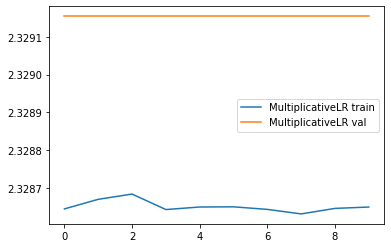



MultiStepLR


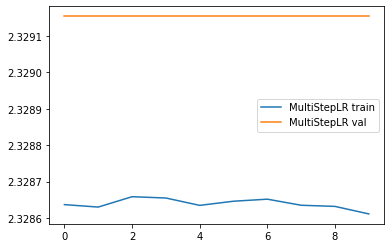

In [32]:
plot_losses(train_loss,val_loss,optimizers)
train_preds, train_labels,test_preds, test_labels = performance(mlp,optimizers)

In [33]:
final_metrics = get_metrics_somehow(mlp, train_preds, train_labels,test_preds, test_labels, optimizers)
print(final_metrics)

          Optimizer  Accuracy Train  Accuracy Test  F1 Score Train  \
0  MultiplicativeLR        0.039867         0.0421        0.063824   
1       MultiStepLR        0.039867         0.0421        0.063824   

   F1 Score Test  
0       0.050365  
1       0.050365  


### Step six: Define 3 models with following changes:
1. Add BatchNorm
2. Add Dropout
3. Add BatchNorm and Dropout

###Batch norm
BatchNorm is a technique that normalizes the inputs to each layer, making the training process more stable and efficient. We can add BatchNorm after each fully connected layer.

In [34]:
## BatchNorm
class SimpleMLP_BN(nn.Module):
    def __init__(self):
      super(SimpleMLP_BN,self).__init__()
      self.fc1 = nn.Linear(28*28, 128)
      self.bn1 = nn.BatchNorm1d(128)  # BatchNorm layer added
      self.relu = nn.ReLU()
      self.fc2 = nn.Linear(128, 10)
      self.bn2 = nn.BatchNorm1d(10)    # Add BatchNorm after fc2
        # code here
    def forward(self,x):
      x = x.view(-1, 28*28)
      x = self.fc1(x)
      x = self.bn1(x)  # BatchNorm layer applied after the first linear layer
      x = self.relu(x)
      x = self.fc2(x)
      x = self.bn2(x)   # BatchNorm after fc2
      return x

In [35]:
# Dropout
class SimpleMLP_Dropout(nn.Module):
    def __init__(self):
        super(SimpleMLP_Dropout, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)   # Add Dropout after fc1
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)   # Dropout after fc1
        x = self.fc2(x)

        return x


In [36]:
##batchnorm dropout
class SimpleMLP_BN_DP(nn.Module):
    def __init__(self):
        super(SimpleMLP_BN_DP,self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer to hidden layer
        self.bn1 = nn.BatchNorm1d(128)   # BatchNorm layer
        self.relu = nn.ReLU()  # Activation function
        self.dropout = nn.Dropout(0.2)   # Dropout layer
        self.fc2 = nn.Linear(128, 10)  # Hidden layer to output layer
        
    def forward(self,x):
        x = x.view(-1, 28*28)  # Flatten the input image
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x


### Step seven: Train the above models and compare with SimpleMLP.

Use your choice of optimizer, use no lr_scheduler so as to re-use the previous results.

Perform analysis. You've got the drill by now.

In [37]:
# code here
def train(MLP_model, dataloader , optimizer):
  MLP_model.train()
  train_loss = 0.0
  train_acc = 0.0
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  for batch_idx, (data, target) in enumerate(dataloader):
    optimizer.zero_grad()
    # Move data to GPU if available
    # if torch.cuda.is_available():
    #   data, target = data.cuda(), target.cuda()
    # data, target = data.cuda(), target.cuda()
    # Compute the forward pass
    out = MLP_model(data)
    # Compute the loss
    loss = torch.nn.functional.cross_entropy(out, target)
    # Compute gradients and update weights
    loss.backward()
    optimizer.step()

def test(MLP_model, test_loader):
    MLP_model.eval()
    test_loss = 0
    correct = 0
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # device = torch.device("cuda")
    with torch.no_grad():
        for data, target in test_loader:
            out = MLP_model(data)
            test_loss += torch.nn.functional.cross_entropy(out, target).item()
            pred = out.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, accuracy  


In [38]:
# Set random seed for reproducibility
# torch.manual_seed(42)
# Define the models
mlp = SimpleMLP()
mlp_bn = SimpleMLP_BN()
mlp_dp = SimpleMLP_Dropout()
mlp_bn_dp = SimpleMLP_BN_DP()

# Define the optimizer and criterion
optimizer_Adam_mlp = optim.Adam(mlp.parameters(), lr=0.001)
optimizer_Adam_mlp_bn = optim.Adam(mlp_bn.parameters(), lr=0.001)
optimizer_Adam_mlp_dp = optim.Adam(mlp_dp.parameters(), lr=0.001)
optimizer_Adam_mlp_bn_dp = optim.Adam(mlp_bn_dp.parameters(), lr=0.001)

# Train the models
EPOCS = 10
for epoch in range(EPOCS):
  train(mlp, trainloader_minibatch, optimizer_Adam_mlp)
  test_loss, accuracy = test(mlp, testloader)

  train(mlp_bn, trainloader_minibatch, optimizer_Adam_mlp_bn)
  test_loss_bn, accuracy_bn = test(mlp_bn, testloader)

  train(mlp_dp, trainloader_minibatch, optimizer_Adam_mlp_dp)
  test_loss_dp, accuracy_dp = test(mlp_dp, testloader)
  
  train(mlp_bn_dp, trainloader_minibatch, optimizer_Adam_mlp_bn_dp)
  test_loss_bn_dp, accuracy_bn_dp = test(mlp_bn_dp, testloader)

  print('Epoc: ', epoch)
  print('SimpleMLP Test =  Loss: {:.6f} Accuracy: {:.2f}%'.format(test_loss, accuracy))
  print('BatchNorm Test =  Loss: {:.6f} Accuracy: {:.2f}%'.format(test_loss_bn, accuracy_bn))
  print('DROPOUT   Test =  Loss: {:.6f} Accuracy: {:.2f}%'.format(test_loss_dp, accuracy_dp))
  print('BNorm_DP  Test =  Loss: {:.6f} Accuracy: {:.2f}%'.format(test_loss_bn_dp, accuracy_bn_dp))

Epoc:  0
SimpleMLP Test =  Loss: 0.003636 Accuracy: 92.58%
BatchNorm Test =  Loss: 0.003095 Accuracy: 96.66%
DROPOUT   Test =  Loss: 0.004192 Accuracy: 92.13%
BNorm_DP  Test =  Loss: 0.002393 Accuracy: 95.48%
Epoc:  1
SimpleMLP Test =  Loss: 0.002548 Accuracy: 95.09%
BatchNorm Test =  Loss: 0.002111 Accuracy: 97.17%
DROPOUT   Test =  Loss: 0.003422 Accuracy: 93.69%
BNorm_DP  Test =  Loss: 0.001772 Accuracy: 96.69%
Epoc:  2
SimpleMLP Test =  Loss: 0.002245 Accuracy: 95.77%
BatchNorm Test =  Loss: 0.001628 Accuracy: 97.63%
DROPOUT   Test =  Loss: 0.002857 Accuracy: 94.40%
BNorm_DP  Test =  Loss: 0.001490 Accuracy: 97.14%
Epoc:  3
SimpleMLP Test =  Loss: 0.001630 Accuracy: 96.77%
BatchNorm Test =  Loss: 0.001419 Accuracy: 97.65%
DROPOUT   Test =  Loss: 0.002598 Accuracy: 94.79%
BNorm_DP  Test =  Loss: 0.001354 Accuracy: 97.41%
Epoc:  4
SimpleMLP Test =  Loss: 0.001706 Accuracy: 96.58%
BatchNorm Test =  Loss: 0.001187 Accuracy: 97.92%
DROPOUT   Test =  Loss: 0.002687 Accuracy: 94.75%
BNorm

### Step eight: Mini-batch vs Stocastic
Now that you might have a clear winner in your mind regarding which model and settings perform the best, train it on mini-batch and stocastic and compare time taken, loss curve, accuracy etc.

Perform an analysis like never before!

#BATCHNORM DP

In [39]:
mlp_bn_dp = SimpleMLP_BN()

In [40]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [45]:
# code, plots and explainiation here
def plot_losses(train_loss, val_loss,optimizers):
  for opt_name, optimizer in optimizers.items():
    print(opt_name)
    plt.plot(train_loss[opt_name], label=f"{opt_name} train")
    plt.plot(val_loss[opt_name], label=f"{opt_name} val")
    plt.legend()
    plt.show()
    print()
    print()
def train2(model,optimizers,loader):
  mlp.to(device)
  EPOCHS = 15
  train_loss = {opt_name: [] for opt_name in optimizers}
  val_loss = {opt_name: [] for opt_name in optimizers}
  # Train the MLP with each optimizer and store the losses

  for opt_name, optimizer in optimizers.items():
    print(f"Training with optimizer: {opt_name}")

    #  # Move model to the same device as the data
    for epoch in range(EPOCHS):
      pbar = tqdm(total=len(loader))
      out_loss = 0
      epoch_train_loss = 0.0
      epoch_test_loss = 0.0

      for batch_idx, (data, target) in enumerate(loader):
        optimizer.zero_grad()
        '''ensures that we start with a clean slate
         for the gradients of the current batch, so
          that we can compute the gradients for that
          batch without interference from the
          gradients computed for previous batches.
        '''
        # Move data to GPU if available
        data, target = data.to(device), target.to(device)
        # Compute the forward pass
        output = model(data)
        # Compute the loss
        loss = torch.nn.functional.cross_entropy(output, target)
        # Compute gradients and update weights
        loss.backward()
        optimizer.step()
        # Accumulate the loss
        out_loss += loss.cpu().data.item()
        pbar.update(1)
        pbar.desc= f'Loss: {loss.item()}'

        # Accumulate the loss
        epoch_train_loss += loss.item() * data.size(0)
      # Store the training loss for the current epoch and optimizer
      train_loss[opt_name].append(out_loss/len(loader))

      with torch.no_grad():
        out_loss = 0
        for batch_idx, (data, target) in enumerate(testloader):
          # Move data to GPU if available
          data, target = data.to(device), target.to(device)
          # Compute forward pass
          output = model(data)
          # Compute the loss
          loss =  torch.nn.functional.cross_entropy(output, target)
          # Accumulate the loss
          out_loss += loss.cpu().data.item()
          epoch_test_loss += loss.item() * data.size(0)
        # Store the validation loss for the current epoch and optimizer  
        val_loss[opt_name].append(out_loss/len(testloader))
      # Print the epoch statistics
      epoch_train_loss /= len(trainset)
      epoch_test_loss /= len(testset)
      print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")  
      print()
      pbar.refresh()
      pbar.close()
  return train_loss,val_loss

def performance2(model,optimizers,loader):
  train_preds, train_labels = [], []
  test_preds, test_labels = [], []

  for optimizer_name, optimizer in optimizers.items():
    model.eval()
    for inputs, labels in loader:
        inputs , labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        train_preds.extend(preds.tolist())
        train_labels.extend(labels.tolist())

    for inputs, labels in testloader:
        inputs , labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.tolist())
        test_labels.extend(labels.tolist())

  return train_preds, train_labels,test_preds, test_labels
    
def get_metrics_somehow(model,train_preds, train_labels,test_preds, test_labels, optimizers):
  # Evaluate the final performance of the model on the train and test datasets
  metrics = []
  i = 1
  for optimizer_name, optimizer in optimizers.items():
      train_acc = accuracy_score(train_labels, train_preds)
      test_acc = accuracy_score(test_labels, test_preds)
      train_f1, _, _, _ = precision_recall_fscore_support(train_labels, train_preds, average='macro')
      test_f1, _, _, _ = precision_recall_fscore_support(test_labels, test_preds, average='macro')
      # Create a DataFrame for the performance metrics
      # Add the performance metrics to the list
      metrics.append({
          'Optimizer': optimizer_name,
          'Accuracy Train': train_acc,
          'Accuracy Test': test_acc,
          'F1 Score Train': train_f1,
          'F1 Score Test': test_f1
      })
      i+=1
  # Create a DataFrame from the list of metrics
  metrics_df = pd.DataFrame(metrics)

  return metrics_df    




# trainloader_minibatch

In [46]:
ADAM = optim.Adam(mlp_bn_dp.to(device).parameters(), lr=0.001)

optimizers = {
    "ADAM" : ADAM
}

In [47]:
loader = trainloader_minibatch

In [48]:
# code 
train_loss,val_loss= train2(mlp_bn_dp,optimizers,loader)


Training with optimizer: ADAM





  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<02:13,  7.03it/s]


Loss: 1.1839038133621216:   1%|          | 10/938 [00:00<00:20, 45.27it/s]


Loss: 0.9978780746459961:   2%|▏         | 16/938 [00:00<00:18, 49.25it/s]


Loss: 0.9025481939315796:   2%|▏         | 23/938 [00:00<00:16, 55.00it/s]


Loss: 0.8162986040115356:   3%|▎         | 30/938 [00:00<00:15, 58.94it/s]


Loss: 0.8107750415802002:   4%|▍         | 37/938 [00:00<00:15, 57.16it/s]


Loss: 0.7261711359024048:   5%|▍         | 45/938 [00:00<00:14, 60.94it/s]


Loss: 0.7038083672523499:   6%|▌         | 53/938 [00:00<00:13, 66.13it/s]


Loss: 0.6617921590805054:   6%|▋         | 60/938 [00:01<00:13, 63.02it/s]


Loss: 0.6563818454742432:   7%|▋         | 68/938 [00:01<00:13, 65.83it/s]


Loss: 0.6746687293052673:   8%|▊         | 75/938 [00:01<00:13, 66.16it/s]


Loss: 0.677355170249939:   9%|▉         | 83/938 [00:01<00:12, 66.00it/s] 


Loss: 0.6509103178977966:  10%|▉         | 91/938 [00:01<0

Epoch 1/15, Train Loss: 0.4237, Test Loss: 0.2405






  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<02:05,  7.45it/s]


Loss: 0.16997890174388885:   1%|          | 10/938 [00:00<00:19, 47.46it/s]


Loss: 0.28330591320991516:   2%|▏         | 16/938 [00:00<00:19, 48.23it/s]


Loss: 0.22884903848171234:   3%|▎         | 24/938 [00:00<00:16, 56.05it/s]


Loss: 0.22105202078819275:   3%|▎         | 32/938 [00:00<00:14, 63.41it/s]


Loss: 0.17772552371025085:   4%|▍         | 39/938 [00:00<00:13, 65.07it/s]


Loss: 0.24205918610095978:   5%|▍         | 46/938 [00:00<00:13, 64.26it/s]


Loss: 0.18637147545814514:   6%|▌         | 53/938 [00:00<00:13, 64.34it/s]


Loss: 0.16759614646434784:   7%|▋         | 61/938 [00:01<00:13, 66.13it/s]


Loss: 0.27202317118644714:   7%|▋         | 68/938 [00:01<00:13, 66.72it/s]


Loss: 0.15645582973957062:   8%|▊         | 75/938 [00:01<00:13, 63.15it/s]


Loss: 0.25462624430656433:   9%|▊         | 82/938 [00:01<00:13, 62.43it/s]


Loss: 0.20505192875862122:   9%|▉         | 89/

Epoch 2/15, Train Loss: 0.1953, Test Loss: 0.1602






  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<02:52,  5.42it/s]


Loss: 0.06973226368427277:   0%|          | 4/938 [00:00<00:59, 15.73it/s]


Loss: 0.09793604910373688:   1%|          | 8/938 [00:00<00:40, 23.15it/s]


Loss: 0.11074454337358475:   1%|▏         | 12/938 [00:00<00:34, 27.16it/s]


Loss: 0.12540015578269958:   2%|▏         | 16/938 [00:00<00:38, 23.67it/s]


Loss: 0.08433715254068375:   2%|▏         | 19/938 [00:00<00:41, 21.97it/s]


Loss: 0.13546879589557648:   2%|▏         | 22/938 [00:01<00:54, 16.77it/s]


Loss: 0.15735606849193573:   3%|▎         | 24/938 [00:01<00:54, 16.81it/s]


Loss: 0.10743793100118637:   3%|▎         | 28/938 [00:01<00:45, 20.07it/s]


Loss: 0.2309965342283249:   4%|▎         | 33/938 [00:01<00:34, 26.49it/s] 


Loss: 0.18910938501358032:   4%|▍         | 38/938 [00:01<00:30, 29.36it/s]


Loss: 0.1529884934425354:   5%|▍         | 43/938 [00:01<00:29, 30.83it/s] 


Loss: 0.15818189084529877:   5%|▌         | 48/93

Epoch 3/15, Train Loss: 0.1325, Test Loss: 0.1227






  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<01:56,  8.06it/s]


Loss: 0.10146388411521912:   1%|          | 9/938 [00:00<00:21, 43.92it/s]


Loss: 0.06807596981525421:   1%|▏         | 14/938 [00:00<00:19, 46.42it/s]


Loss: 0.11836809664964676:   2%|▏         | 19/938 [00:00<00:21, 43.17it/s]


Loss: 0.12292181700468063:   3%|▎         | 24/938 [00:00<00:21, 42.18it/s]


Loss: 0.0920901894569397:   3%|▎         | 29/938 [00:00<00:21, 42.01it/s] 


Loss: 0.07478906214237213:   4%|▎         | 34/938 [00:00<00:23, 38.67it/s]


Loss: 0.05750912055373192:   4%|▍         | 40/938 [00:01<00:22, 39.33it/s]


Loss: 0.14676786959171295:   5%|▍         | 46/938 [00:01<00:21, 41.58it/s]


Loss: 0.1377430111169815:   5%|▌         | 51/938 [00:01<00:20, 42.81it/s] 


Loss: 0.09652189165353775:   6%|▌         | 56/938 [00:01<00:23, 38.01it/s]


Loss: 0.09404274076223373:   6%|▋         | 60/938 [00:01<00:23, 37.78it/s]


Loss: 0.050688497722148895:   7%|▋         | 66/

Epoch 4/15, Train Loss: 0.1003, Test Loss: 0.1100






  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<01:49,  8.56it/s]


Loss: 0.15452547371387482:   1%|          | 7/938 [00:00<00:29, 31.79it/s]


Loss: 0.06037480756640434:   1%|▏         | 14/938 [00:00<00:19, 46.94it/s]


Loss: 0.08233422785997391:   2%|▏         | 21/938 [00:00<00:17, 53.06it/s]


Loss: 0.08882424980401993:   3%|▎         | 27/938 [00:00<00:17, 51.63it/s]


Loss: 0.03218110650777817:   4%|▎         | 34/938 [00:00<00:15, 56.99it/s]


Loss: 0.08439745008945465:   4%|▍         | 41/938 [00:00<00:15, 58.95it/s]


Loss: 0.06117844209074974:   5%|▌         | 48/938 [00:00<00:15, 57.99it/s]


Loss: 0.04348180815577507:   6%|▌         | 56/938 [00:01<00:14, 62.32it/s]


Loss: 0.10810604691505432:   7%|▋         | 63/938 [00:01<00:13, 62.69it/s]


Loss: 0.1296958178281784:   7%|▋         | 70/938 [00:01<00:14, 60.88it/s] 


Loss: 0.08586164563894272:   8%|▊         | 77/938 [00:01<00:14, 60.85it/s]


Loss: 0.03654775395989418:   9%|▉         | 84/9

Epoch 5/15, Train Loss: 0.0818, Test Loss: 0.1019






  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<02:09,  7.22it/s]


Loss: 0.08062094449996948:   1%|          | 9/938 [00:00<00:23, 39.50it/s]


Loss: 0.09590008109807968:   2%|▏         | 15/938 [00:00<00:20, 44.90it/s]


Loss: 0.03218817338347435:   2%|▏         | 21/938 [00:00<00:19, 46.93it/s]


Loss: 0.029390739277005196:   3%|▎         | 28/938 [00:00<00:16, 53.79it/s]


Loss: 0.0786820575594902:   4%|▎         | 34/938 [00:00<00:16, 54.80it/s]  


Loss: 0.04288589581847191:   4%|▍         | 40/938 [00:00<00:16, 52.90it/s]


Loss: 0.06402736157178879:   5%|▍         | 46/938 [00:00<00:16, 54.12it/s]


Loss: 0.020352300256490707:   6%|▌         | 52/938 [00:01<00:16, 54.39it/s]


Loss: 0.04445456340909004:   6%|▋         | 60/938 [00:01<00:14, 58.87it/s] 


Loss: 0.07640253007411957:   7%|▋         | 68/938 [00:01<00:13, 62.46it/s]


Loss: 0.1129070371389389:   8%|▊         | 75/938 [00:01<00:14, 61.04it/s] 


Loss: 0.018519794568419456:   9%|▊         |

Epoch 6/15, Train Loss: 0.0703, Test Loss: 0.0987






  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<02:04,  7.52it/s]


Loss: 0.251772940158844:   1%|          | 9/938 [00:00<00:21, 42.98it/s]


Loss: 0.0936337560415268:   2%|▏         | 16/938 [00:00<00:17, 51.41it/s]


Loss: 0.03619848191738129:   2%|▏         | 22/938 [00:00<00:17, 53.51it/s]


Loss: 0.046701863408088684:   3%|▎         | 28/938 [00:00<00:16, 54.60it/s]


Loss: 0.040339145809412:   4%|▎         | 34/938 [00:00<00:16, 55.87it/s]   


Loss: 0.0726911872625351:   4%|▍         | 41/938 [00:00<00:15, 59.70it/s]


Loss: 0.03248411789536476:   5%|▌         | 48/938 [00:00<00:14, 61.59it/s]


Loss: 0.038470830768346786:   6%|▌         | 55/938 [00:01<00:14, 59.92it/s]


Loss: 0.14075233042240143:   7%|▋         | 62/938 [00:01<00:14, 62.02it/s] 


Loss: 0.0509800910949707:   7%|▋         | 69/938 [00:01<00:14, 60.24it/s] 


Loss: 0.03924496844410896:   8%|▊         | 77/938 [00:01<00:13, 62.29it/s]


Loss: 0.05957477167248726:   9%|▉         | 84/9

Epoch 7/15, Train Loss: 0.0594, Test Loss: 0.0956






  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<02:22,  6.59it/s]


Loss: 0.01880926825106144:   1%|          | 8/938 [00:00<00:26, 34.86it/s]


Loss: 0.0518210306763649:   1%|▏         | 14/938 [00:00<00:21, 43.20it/s]


Loss: 0.024941762909293175:   2%|▏         | 20/938 [00:00<00:18, 48.35it/s]


Loss: 0.0409691222012043:   3%|▎         | 26/938 [00:00<00:17, 52.18it/s]  


Loss: 0.05720262601971626:   3%|▎         | 32/938 [00:00<00:16, 53.57it/s]


Loss: 0.026652639731764793:   4%|▍         | 38/938 [00:00<00:16, 53.81it/s]


Loss: 0.06302248686552048:   5%|▍         | 45/938 [00:00<00:15, 57.86it/s] 


Loss: 0.050522834062576294:   5%|▌         | 51/938 [00:01<00:15, 56.42it/s]


Loss: 0.04336956515908241:   6%|▋         | 59/938 [00:01<00:14, 61.73it/s] 


Loss: 0.055789459496736526:   7%|▋         | 66/938 [00:01<00:14, 59.13it/s]


Loss: 0.06318604946136475:   8%|▊         | 72/938 [00:01<00:14, 58.95it/s] 


Loss: 0.031238587573170662:   8%|▊       

Epoch 8/15, Train Loss: 0.0526, Test Loss: 0.0878






  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<02:18,  6.74it/s]


Loss: 0.15040498971939087:   1%|          | 7/938 [00:00<00:28, 32.73it/s]


Loss: 0.04638189449906349:   1%|▏         | 13/938 [00:00<00:21, 43.42it/s]


Loss: 0.011705424636602402:   2%|▏         | 20/938 [00:00<00:18, 48.80it/s]


Loss: 0.029436912387609482:   3%|▎         | 26/938 [00:00<00:17, 52.02it/s]


Loss: 0.02703205682337284:   4%|▎         | 33/938 [00:00<00:16, 56.47it/s] 


Loss: 0.016266321763396263:   4%|▍         | 39/938 [00:00<00:15, 57.47it/s]


Loss: 0.07015123963356018:   5%|▍         | 45/938 [00:00<00:16, 55.47it/s] 


Loss: 0.05807191878557205:   5%|▌         | 51/938 [00:01<00:15, 56.39it/s]


Loss: 0.0188363678753376:   6%|▌         | 57/938 [00:01<00:15, 56.36it/s] 


Loss: 0.051922306418418884:   7%|▋         | 63/938 [00:01<00:15, 56.28it/s]


Loss: 0.03335283324122429:   7%|▋         | 69/938 [00:01<00:15, 55.80it/s] 


Loss: 0.025179989635944366:   8%|▊       

Epoch 9/15, Train Loss: 0.0471, Test Loss: 0.0890






  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<02:03,  7.58it/s]


Loss: 0.029573172330856323:   1%|          | 9/938 [00:00<00:20, 44.47it/s]


Loss: 0.11450562626123428:   2%|▏         | 16/938 [00:00<00:16, 54.30it/s]


Loss: 0.02906109020113945:   2%|▏         | 23/938 [00:00<00:16, 56.33it/s]


Loss: 0.017092686146497726:   3%|▎         | 30/938 [00:00<00:15, 60.22it/s]


Loss: 0.03614591434597969:   4%|▍         | 37/938 [00:00<00:15, 59.16it/s] 


Loss: 0.019688468426465988:   5%|▍         | 44/938 [00:00<00:15, 59.28it/s]


Loss: 0.04086059704422951:   5%|▌         | 51/938 [00:00<00:14, 61.56it/s] 


Loss: 0.031269025057554245:   6%|▌         | 58/938 [00:01<00:14, 61.35it/s]


Loss: 0.03309447318315506:   7%|▋         | 65/938 [00:01<00:13, 62.55it/s] 


Loss: 0.04137909784913063:   8%|▊         | 72/938 [00:01<00:13, 62.41it/s]


Loss: 0.01433782372623682:   9%|▊         | 80/938 [00:01<00:13, 64.30it/s]


Loss: 0.03571133315563202:   9%|▉        

Epoch 10/15, Train Loss: 0.0412, Test Loss: 0.0914






  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<02:03,  7.58it/s]


Loss: 0.034875452518463135:   1%|          | 8/938 [00:00<00:24, 38.73it/s]


Loss: 0.013950731605291367:   1%|▏         | 14/938 [00:00<00:19, 47.11it/s]


Loss: 0.014603258110582829:   2%|▏         | 20/938 [00:00<00:17, 51.62it/s]


Loss: 0.015934636816382408:   3%|▎         | 28/938 [00:00<00:15, 59.12it/s]


Loss: 0.1214686706662178:   4%|▍         | 36/938 [00:00<00:14, 62.31it/s]  


Loss: 0.03288990631699562:   5%|▍         | 43/938 [00:00<00:14, 61.58it/s]


Loss: 0.05562213808298111:   5%|▌         | 50/938 [00:00<00:14, 59.37it/s]


Loss: 0.021571459248661995:   6%|▌         | 57/938 [00:01<00:14, 61.69it/s]


Loss: 0.032874852418899536:   7%|▋         | 64/938 [00:01<00:15, 58.02it/s]


Loss: 0.014414711855351925:   7%|▋         | 70/938 [00:01<00:15, 56.71it/s]


Loss: 0.06618143618106842:   8%|▊         | 77/938 [00:01<00:14, 59.79it/s] 


Loss: 0.1325172781944275:   9%|▉       

Epoch 11/15, Train Loss: 0.0349, Test Loss: 0.0852






  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<02:01,  7.74it/s]


Loss: 0.08451034873723984:   1%|          | 9/938 [00:00<00:22, 42.00it/s]


Loss: 0.07835328578948975:   2%|▏         | 16/938 [00:00<00:18, 50.06it/s]


Loss: 0.027808409184217453:   2%|▏         | 23/938 [00:00<00:16, 56.48it/s]


Loss: 0.008636786602437496:   3%|▎         | 30/938 [00:00<00:15, 60.41it/s]


Loss: 0.03376505523920059:   4%|▍         | 37/938 [00:00<00:14, 60.40it/s] 


Loss: 0.07612445950508118:   5%|▍         | 44/938 [00:00<00:14, 61.41it/s]


Loss: 0.03116116300225258:   5%|▌         | 51/938 [00:00<00:14, 59.92it/s]


Loss: 0.0651615783572197:   6%|▌         | 58/938 [00:01<00:14, 60.39it/s] 


Loss: 0.01959245279431343:   7%|▋         | 65/938 [00:01<00:14, 61.41it/s]


Loss: 0.014455030672252178:   8%|▊         | 72/938 [00:01<00:14, 61.11it/s]


Loss: 0.014027521945536137:   8%|▊         | 79/938 [00:01<00:13, 63.23it/s]


Loss: 0.05634476616978645:   9%|▉         |

Epoch 12/15, Train Loss: 0.0347, Test Loss: 0.0869






  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<02:19,  6.69it/s]


Loss: 0.06304521858692169:   1%|          | 8/938 [00:00<00:26, 35.06it/s]


Loss: 0.04476458951830864:   2%|▏         | 16/938 [00:00<00:18, 50.06it/s]


Loss: 0.1007932722568512:   2%|▏         | 23/938 [00:00<00:16, 54.99it/s] 


Loss: 0.03176243603229523:   3%|▎         | 30/938 [00:00<00:15, 59.69it/s]


Loss: 0.00817196536809206:   4%|▍         | 37/938 [00:00<00:15, 58.10it/s]


Loss: 0.011997011490166187:   5%|▍         | 44/938 [00:00<00:14, 60.29it/s]


Loss: 0.07489486038684845:   5%|▌         | 51/938 [00:00<00:14, 59.69it/s] 


Loss: 0.022234609350562096:   6%|▌         | 58/938 [00:01<00:15, 57.60it/s]


Loss: 0.012984459288418293:   7%|▋         | 64/938 [00:01<00:17, 50.92it/s]


Loss: 0.03360818699002266:   7%|▋         | 70/938 [00:01<00:17, 48.56it/s] 


Loss: 0.015262503176927567:   8%|▊         | 75/938 [00:01<00:17, 48.72it/s]


Loss: 0.015899697318673134:   9%|▊        

Epoch 13/15, Train Loss: 0.0306, Test Loss: 0.0862






  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<02:15,  6.91it/s]


Loss: 0.014448251575231552:   1%|          | 7/938 [00:00<00:28, 32.79it/s]


Loss: 0.028413129970431328:   1%|▏         | 13/938 [00:00<00:21, 43.80it/s]


Loss: 0.07577197998762131:   2%|▏         | 19/938 [00:00<00:19, 47.85it/s] 


Loss: 0.01615956425666809:   3%|▎         | 25/938 [00:00<00:17, 51.46it/s]


Loss: 0.015387904830276966:   3%|▎         | 32/938 [00:00<00:16, 55.16it/s]


Loss: 0.060107748955488205:   4%|▍         | 39/938 [00:00<00:15, 56.84it/s]


Loss: 0.02372772805392742:   5%|▍         | 45/938 [00:00<00:15, 56.86it/s] 


Loss: 0.11341343820095062:   6%|▌         | 53/938 [00:01<00:14, 62.11it/s]


Loss: 0.12001145631074905:   6%|▋         | 60/938 [00:01<00:14, 61.88it/s]


Loss: 0.0441158302128315:   7%|▋         | 67/938 [00:01<00:15, 56.40it/s] 


Loss: 0.03849111869931221:   8%|▊         | 73/938 [00:01<00:15, 57.00it/s]


Loss: 0.010749663226306438:   8%|▊        

Epoch 14/15, Train Loss: 0.0291, Test Loss: 0.0895






  0%|          | 0/938 [00:00<?, ?it/s]


  0%|          | 1/938 [00:00<02:13,  7.01it/s]


Loss: 0.019268378615379333:   1%|          | 7/938 [00:00<00:28, 32.14it/s]


Loss: 0.05403999984264374:   1%|▏         | 13/938 [00:00<00:22, 41.29it/s]


Loss: 0.061817921698093414:   2%|▏         | 19/938 [00:00<00:19, 47.14it/s]


Loss: 0.00661085732281208:   3%|▎         | 26/938 [00:00<00:17, 53.54it/s] 


Loss: 0.012396566569805145:   4%|▎         | 33/938 [00:00<00:16, 55.40it/s]


Loss: 0.036859091371297836:   4%|▍         | 40/938 [00:00<00:15, 59.77it/s]


Loss: 0.039052315056324005:   5%|▌         | 47/938 [00:00<00:14, 59.65it/s]


Loss: 0.017296355217695236:   6%|▌         | 55/938 [00:01<00:13, 63.49it/s]


Loss: 0.015219788067042828:   7%|▋         | 62/938 [00:01<00:14, 59.72it/s]


Loss: 0.03270941972732544:   7%|▋         | 69/938 [00:01<00:14, 60.45it/s] 


Loss: 0.022747935727238655:   8%|▊         | 76/938 [00:01<00:14, 58.43it/s]


Loss: 0.020607158541679382:   9%|▉    

Epoch 15/15, Train Loss: 0.0272, Test Loss: 0.0865



ADAM


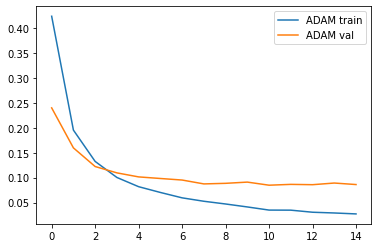



ADAM


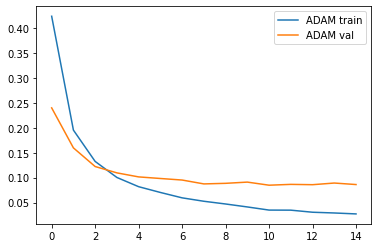



  Optimizer  Accuracy Train  Accuracy Test  F1 Score Train  F1 Score Test
0      ADAM        0.997517         0.9783         0.99754       0.978424


In [49]:
plot_losses(train_loss,val_loss,optimizers)
train_preds, train_labels,test_preds, test_labels = performance2(mlp_bn_dp,optimizers,loader)
plot_losses(train_loss,val_loss,optimizers)
final_metrics = get_metrics_somehow(mlp_bn_dp, train_preds, train_labels,test_preds, test_labels, optimizers)
print(final_metrics)

# trainloader_stochastic

In [78]:
class SimpleMLP_BN_DP1(nn.Module):
    def __init__(self):
        super(SimpleMLP_BN_DP1,self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer to hidden layer
        self.bn1 = nn.BatchNorm1d(128)   # BatchNorm layer
        self.relu = nn.ReLU()  # Activation function
        self.dropout = nn.Dropout(0.2)   # Dropout layer
        self.fc2 = nn.Linear(128, 10)  # Hidden layer to output layer
        
    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input image
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x


In [79]:
mlp_bn_DP = SimpleMLP_BN_DP1()
ADAM = optim.Adam(mlp_bn_DP.to(device).parameters(), lr=0.001)
optimizers = {
    "ADAM" : ADAM
}
loader = trainloader_stochastic

In [77]:
# code 
train_loss,val_loss= train2(mlp_bn_DP,optimizers,loader)
plot_losses(train_loss,val_loss,optimizers)
train_preds, train_labels,test_preds, test_labels = performance2(mlp_bn_DP,optimizers,loader)
final_metrics = get_metrics_somehow(mlp_bn_DP, train_preds, train_labels,test_preds, test_labels, optimizers)
print(final_metrics)

Training with optimizer: ADAM





  0%|          | 0/60000 [00:00<?, ?it/s]

ValueError: ignored

### And most importantly!!! What did we learn?
Discuss any and all learnings here. The discussions must be all-encompassing so that we know what did you learn. 

Please do not copy from your friend or copy-paste from the internet. We can see repetitions during evaluations.

In [ ]:
# text here
